In [2]:
using DataFrames
using Distributions
using Gadfly
using Cairo
using StatsBase
set_default_plot_size(30cm, 15cm)

In [3]:
mtn_gdte_whole_dd3_filename = string("/home/german/labo/16/hemo/cavities/newana_mode_gradient/vtores/dd3_vec_pocket_mtn_whole")
mto_gdte_whole_dd3_filename = string("/home/german/labo/16/hemo/cavities/newana_mode_gradient/vtores/dd3_vec_pocket_mto_whole")
tfo_gdte_whole_dd3_filename = string("/home/german/labo/16/hemo/cavities/newana_mode_gradient/vtores/dd3_vec_pocket_tfo_whole")

df_mtn_gdte_whole_dd3 = readtable(mtn_gdte_whole_dd3_filename)
df_mto_gdte_whole_dd3 = readtable(mto_gdte_whole_dd3_filename)
df_tfo_gdte_whole_dd3 = readtable(tfo_gdte_whole_dd3_filename);

mtn_gdte_whole_dd3 = df_mtn_gdte_whole_dd3[:, 1]
mto_gdte_whole_dd3 = df_mto_gdte_whole_dd3[:, 1]
tfo_gdte_whole_dd3 = df_tfo_gdte_whole_dd3[:, 1];

mtn_gdte_whole_dd3_layer = layer(df_mtn_gdte_whole_dd3, y="delta", Geom.bar(position=:dodge),
Theme(default_color=colorant"deepskyblue", bar_spacing = 1pt))
mto_gdte_whole_dd3_layer = layer(df_mto_gdte_whole_dd3, y="delta", Geom.bar(position=:dodge),
Theme(default_color=colorant"blue", bar_spacing = 1pt))
tfo_gdte_whole_dd3_layer = layer(df_tfo_gdte_whole_dd3, y="delta", Geom.bar(position=:dodge),
Theme(default_color=colorant"purple", bar_spacing = 1pt));

### Hay distintas formas de compilar los vectores. Modificar según conveniencia

In [8]:
equi = [range(1, 1, length(mto_gdte_whole_dd3))]
mtn_gdte_whole_dd3_ext = [mtn_gdte_whole_dd3; rep([0], length(mto_gdte_whole_dd3) - length(mtn_gdte_whole_dd3))]
tfo_gdte_whole_dd3_ext = [tfo_gdte_whole_dd3; rep([0], length(mto_gdte_whole_dd3) - length(tfo_gdte_whole_dd3))]
gdte_whole_dd3_ext = [mtn_gdte_whole_dd3_ext mto_gdte_whole_dd3 tfo_gdte_whole_dd3_ext equi];
df_gdte_whole_dd3_ext = DataFrame(mtn = mtn_gdte_whole_dd3_ext, mto = mto_gdte_whole_dd3,
tfo = tfo_gdte_whole_dd3_ext, x = equi);

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in vect at abstractarray.jl:32
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/german/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /home/german/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[8], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in rep at deprecated.jl:50 (repeats 2 times)
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/german/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /home/german/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[8], in expression starting on line 2


# 1eros 20 elementos de vectores gradiente de canal whole mtn, mto y tfo

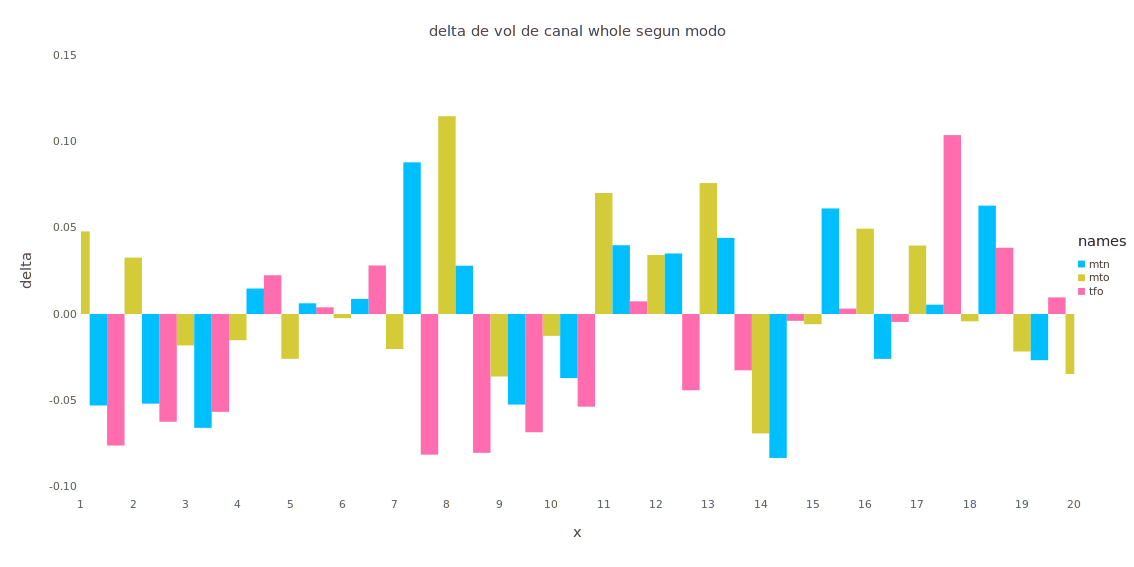

In [17]:
# Junto los 1eros 20 de c/u
all_gdte_whole_dd3 = [mtn_gdte_whole_dd3_ext[1:20]; mto_gdte_whole_dd3[1:20]; tfo_gdte_whole_dd3_ext[1:20]]
# Armo el eje 'X'
equis = [rep([range(1, 1, 20)], 3)];
# Armo las labels p/ después poder separar las barras
names_column = [rep(["mtn"], [20]); rep(["mto"], [20]); rep(["tfo"], [20])]
# Junto todo en un dataframe
df_all_gdte_whole_dd3 = DataFrame(delta = all_gdte_whole_dd3, names = names_column, x = equis);

# Plotteo el dataframe
pdf_gdte_whole = plot(df_all_gdte_whole_dd3,
x="x", y = "delta", color = "names",
Geom.bar(position=:dodge),
#Guide.manual_color_key("Legend", ["mtn", "mto", "tfo"],
#["deepskyblue", "blue", "purple"]),
Guide.Title("delta de vol de canal whole segun modo"),
Coord.Cartesian(xmin=1, xmax=20),
Scale.x_discrete, Theme(line_width=8pt, bar_spacing=0pt, grid_line_width=0pt),
Guide.xticks(ticks = collect(1:1:20), orientation=:horizontal))

# Correlaciones entre vectores gradiente de canal whole mtn, mto y tfo

In [11]:
mto_gdte_whole_dd3_cut = mto_gdte_whole_dd3[1:length(mtn_gdte_whole_dd3)]
tfo_gdte_whole_dd3_cut = tfo_gdte_whole_dd3[1:length(mtn_gdte_whole_dd3)]
corspearman(mtn_gdte_whole_dd3, mto_gdte_whole_dd3_cut)

0.02536022634311088

In [12]:
corspearman(mtn_gdte_whole_dd3, tfo_gdte_whole_dd3_cut)

0.0309581458706507

In [13]:
corspearman(mto_gdte_whole_dd3_cut, tfo_gdte_whole_dd3_cut)

-0.03132307000639933

### Correlación vectores gradiente de canal whole mtn, mto y tfo; tomando los 1eros 1 a 300 elementos

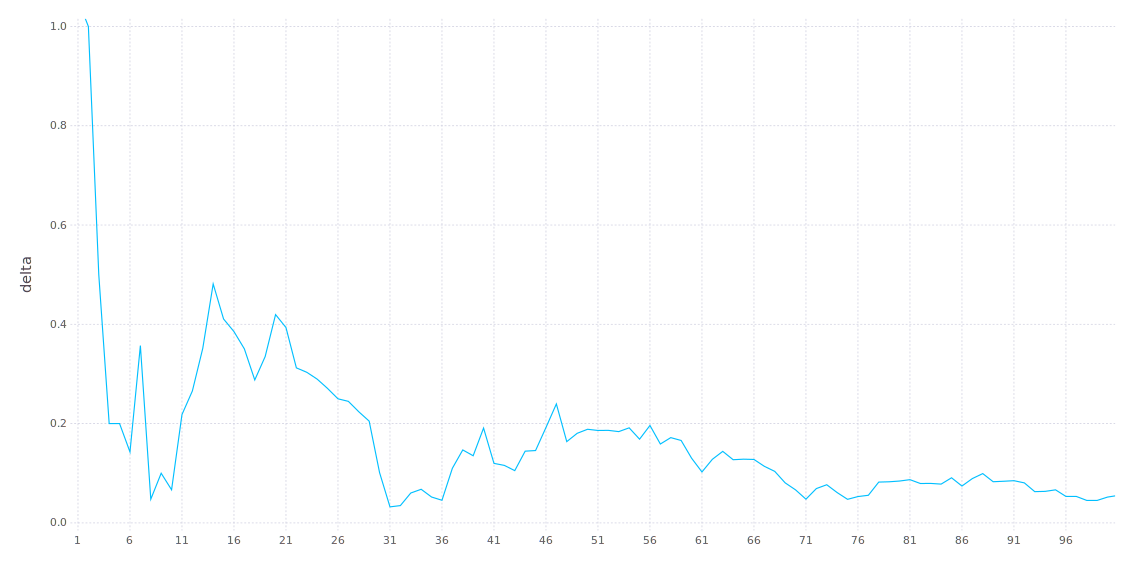

In [14]:
corr_mtn_mto = Array{Float64}(0);
for i=1:300
    push!(corr_mtn_mto, corspearman(mtn_gdte_whole_dd3[1:i], mto_gdte_whole_dd3_cut[1:i]))
end
corr_mtn_mto = abs(corr_mtn_mto)
df_corr_mtn_mto = DataFrame(delta = corr_mtn_mto)
plot(df_corr_mtn_mto, y="delta", Geom.line, Guide.xticks(ticks=collect(1:5:100)),
Guide.yticks(ticks=collect(0:.2:1)),
Coord.Cartesian(xmin=1, xmax=100))

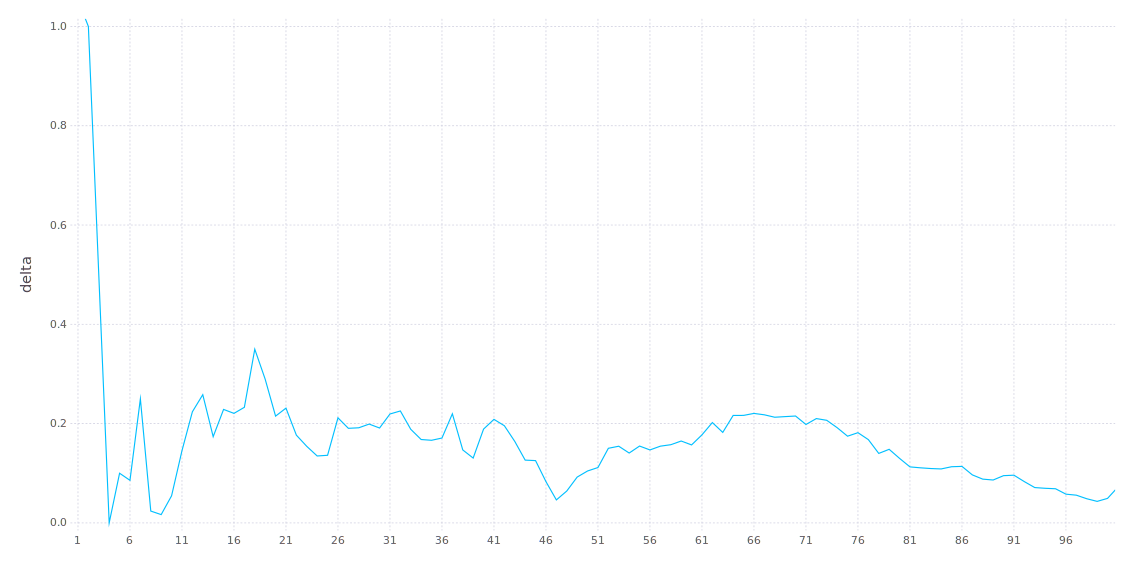

In [15]:
corr_mtn_tfo = Array{Float64}(0);
for i=1:300
    push!(corr_mtn_tfo, corspearman(mtn_gdte_whole_dd3[1:i], tfo_gdte_whole_dd3_cut[1:i]))
end
corr_mtn_tfo = abs(corr_mtn_tfo)
df_corr_mtn_tfo = DataFrame(delta = corr_mtn_tfo)
plot(df_corr_mtn_tfo, y="delta", Geom.line, Guide.xticks(ticks=collect(1:5:100)),
Guide.yticks(ticks=collect(0:.2:1)),
Coord.Cartesian(xmin=1, xmax=100))

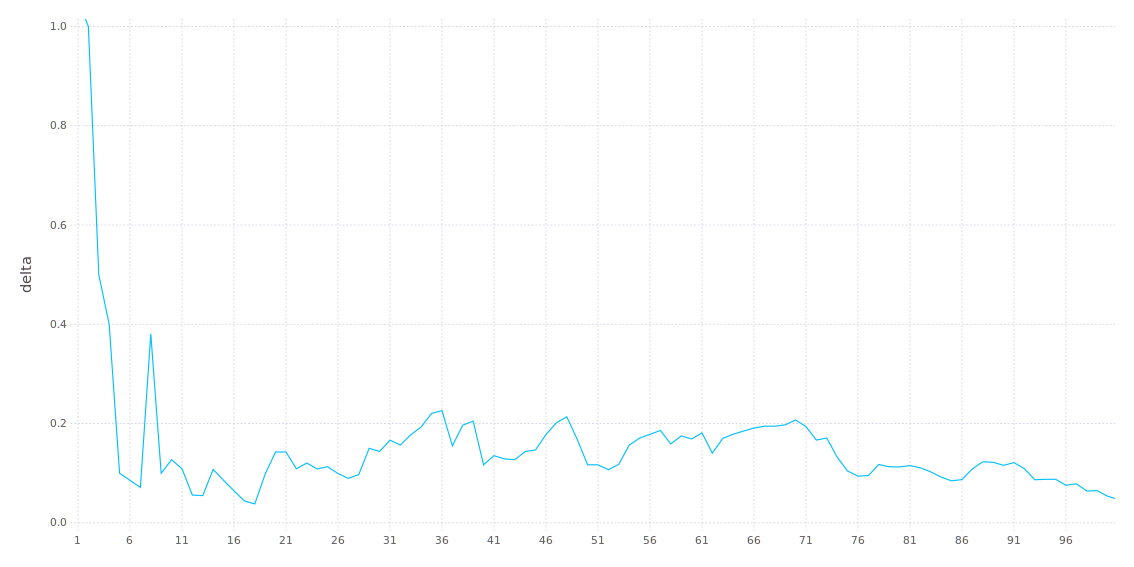

In [16]:
corr_mto_tfo = Array{Float64}(0);
for i=1:300
    push!(corr_mto_tfo, corspearman(mto_gdte_whole_dd3[1:i], tfo_gdte_whole_dd3_cut[1:i]))
end
corr_mto_tfo = abs(corr_mto_tfo)
df_corr_mto_tfo = DataFrame(delta = corr_mto_tfo)
plot(df_corr_mto_tfo, y="delta", Geom.line, Guide.xticks(ticks=collect(1:5:100)),
Guide.yticks(ticks=collect(0:.2:1)),
Coord.Cartesian(xmin=1, xmax=100))